## Compare HCP subject: old vs. new maxLL estimation


Old maxLL estimation, I used `TrialType` as only aggregate variable and exclude `neutral` trials.

New maxLL estimation, I used `TrialType` and `BlockType` as aggregate variable, and include neutral trials.


In [1]:
import sys
import os
SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)
from simulate import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

main_dir = os.path.abspath(os.path.dirname(os.getcwd()))
subject_dir = 'data/simulation_2condition_include_neutral/subject_data'
# subject_dir = 'data/subject_data'
main_dir, subject_dir

ACT-R connection has been started.


('/home/chery/Documents/Github/RLvIBL-Re',
 'data/simulation_2condition_include_neutral/subject_data')

## Load maxLL 

In [2]:
# combine maxLL
# save_model_classification(main_dir=main_dir, subject_dir=subject_dir, param_list=None, overwrite=True)

...OVERWRITE...[data/simulation_2condition_include_neutral/subject_data]
No DIR data/simulation_2condition_include_neutral/subject_data
...EMPTY...CREATE DIR: [data/simulation_2condition_include_neutral/subject_data]
...COMPLETE MODEL CLASSIFICATION...[actr_maxLL.csv]


,HCPID,LL.m1,LL.m2,LL.diff,BestModel,ans.m,bll.m,lf.m,egs.m,alpha.m,r.m
21,100307_fnca,-5.922307,-5.964616,0.042309,model1,0.50,0.35,0.1,0.45,0.05,1
70,100408_fnca,-5.761263,-5.699077,-0.062187,model2,0.50,0.35,0.1,0.35,0.05,1
105,101006_fnca,-6.454065,-5.975759,-0.478306,model2,0.50,0.60,0.1,0.10,0.05,1
16,101107_fnca,-5.557782,-5.743604,0.185822,model1,0.35,0.45,0.1,0.45,0.15,1
103,101309_fnca,-6.533976,-6.384699,-0.149277,model2,0.50,0.70,0.1,0.50,0.05,1
...,...,...,...,...,...,...,...,...,...,...,...
118,178748_fnca,-6.311498,-5.822672,-0.488826,model2,0.50,0.50,0.1,0.10,0.05,1
113,178849_fnca,-5.912284,-6.186879,0.274595,model1,0.45,0.65,0.1,0.50,0.20,1
74,178950_fnca,-5.664600,-5.708426,0.043825,model1,0.50,0.65,0.1,0.50,0.05,1
20,992774_fnca,-6.359077,-6.371749,0.012672,model1,0.45,0.45,0.1,0.35,0.10,1


In [3]:
df0 = pd.read_csv(os.path.join(main_dir, 'data/old_actr_maxLL.csv'), index_col=0).rename(columns={'best_model':'BestModel'})
df0['BestModel'] = df0['BestModel'].replace({'m1':'model1', 'm2':'model2'})

df1 = pd.read_csv(os.path.join(main_dir, subject_dir, 'actr_maxLL.csv'), usecols=['HCPID', 'BestModel', 'LL.m1', 'LL.m2', 'LL.diff']).drop_duplicates()
print('number of unique HCPID [%d], [%d]'% (len(df0.HCPID.unique()), len(df1.HCPID.unique())))

number of unique HCPID [199], [199]


In [4]:
df_compare = pd.merge(df0, df1, on='HCPID', suffixes=('.old', '.new'))

## MaxLL Distribution

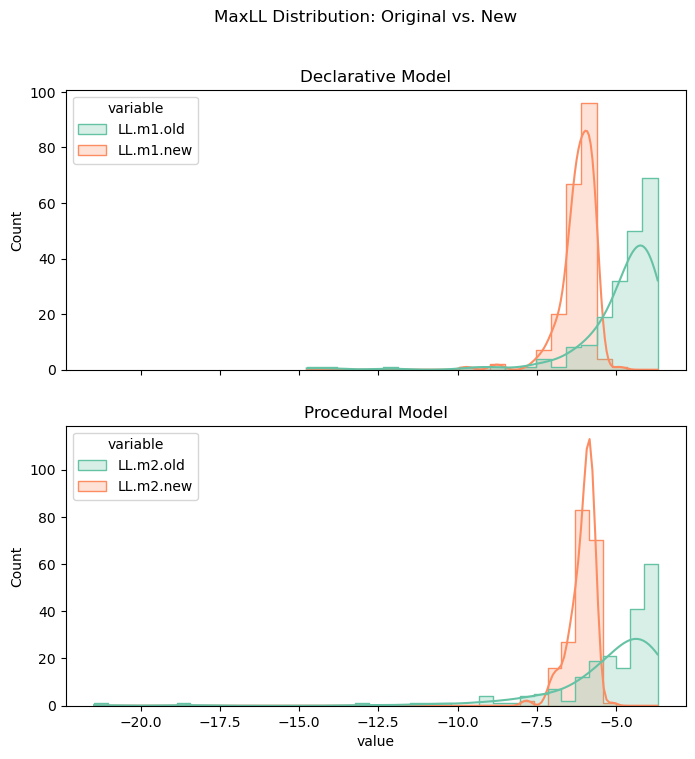

In [5]:
fig, axes = plt.subplots(2,1, figsize=(8,8), sharex=True)
fig.suptitle('MaxLL Distribution: Original vs. New')

sns.histplot(data = df_compare[['HCPID', 'LL.m1.old', 'LL.m1.new']].melt(id_vars='HCPID'), 
             x='value', hue='variable', kde=True, element='step', palette='Set2', ax=axes[0])
sns.histplot(data = df_compare[['HCPID', 'LL.m2.old', 'LL.m2.new']].melt(id_vars='HCPID'), 
             x='value', hue='variable', kde=True, element='step', palette='Set2',ax=axes[1])

axes[0].set_title('Declarative Model')
axes[1].set_title('Procedural Model')
plt.show()

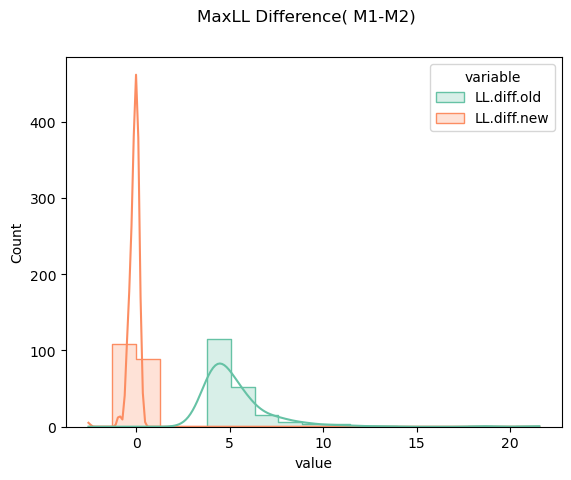

In [6]:
fig, ax = plt.subplots()
fig.suptitle('MaxLL Difference( M1-M2)')
ax = sns.histplot(data = df_compare[['HCPID', 'LL.diff.old', 'LL.diff.new']].melt(id_vars='HCPID'), 
                  x='value', hue='variable', kde=True, element='step', palette='Set2')
plt.show()

## Model Classification

Around 100 subjects -> same classfication

Around 100 misclassifications (old) m1 -> (new) m2

In [7]:
df_compare[['BestModel.old', 'BestModel.new']]

,BestModel.old,BestModel.new
0,model1,model1
1,model2,model2
2,model2,model2
3,model1,model1
4,model1,model2
...,...,...
194,model2,model2
195,model1,model1
196,model1,model1
197,model1,model1


In [8]:
dfc = confusion_matrix(df_compare, 'BestModel.new', 'BestModel.old')

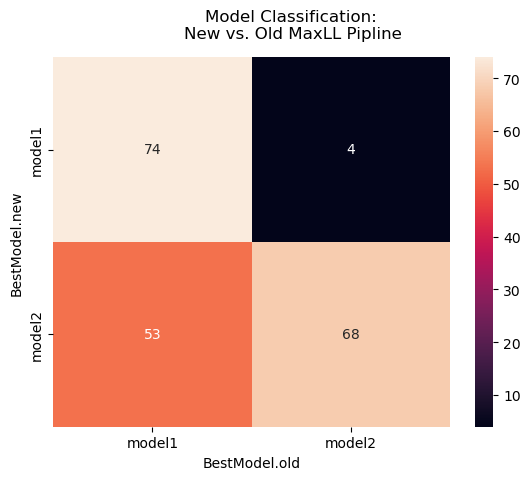

In [17]:
fig, ax = plt.subplots()
fig.suptitle('Model Classification: \nNew vs. Old MaxLL Pipline')
ax = sns.heatmap(dfc, annot=True)
plt.show()

## PSwitch Pattern

Next, let's see how model classification in original vs. new maxLL affects behaviral pattern (PSwitch)

Main Takeaway: original and new model classification results show very **similar** pattern. We might not need to redo fmri network analysis (?)

In [10]:
df_subject_agg = pd.concat([pd.read_csv(f, index_col=0) for f in glob.glob(os.path.join(main_dir, subject_dir, '*', 'aggregate', '*-agg.csv'))], axis=0)
df_model_class = df_compare[['HCPID', 'BestModel.old', 'BestModel.new']]#.melt(id_vars='HCPID', var_name='maxLL_pipline', value_name='model_class')

# merge 
df_subject_agg = pd.merge(df_subject_agg, df_model_class, on='HCPID')

# order
df_subject_agg['TrialType'] = pd.Categorical(df_subject_agg['TrialType'], categories=["Reward", "Punishment", "Neutral"], ordered=True)
df_subject_agg.head()

,HCPID,BlockType,TrialType,ResponseSwitch,BestModel.old,BestModel.new
0,110411_fnca,MostlyPunishment,Neutral,0.000000,model1,model1
1,110411_fnca,MostlyPunishment,Punishment,0.250000,model1,model1
2,110411_fnca,MostlyPunishment,Reward,0.400000,model1,model1
3,110411_fnca,MostlyReward,Neutral,0.666667,model1,model1
4,110411_fnca,MostlyReward,Punishment,0.400000,model1,model1


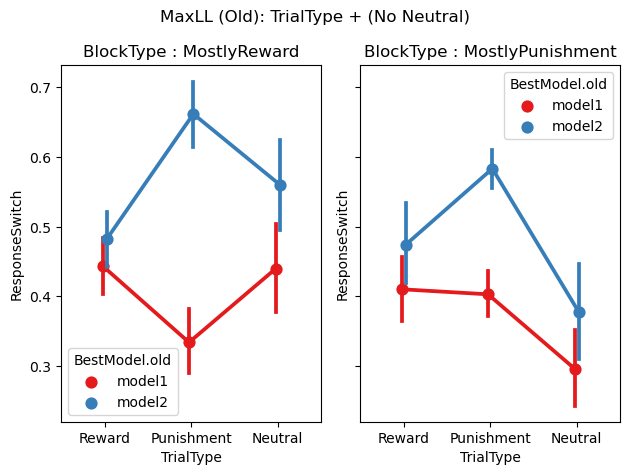

In [11]:
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)
fig.suptitle('MaxLL (Old): TrialType + (No Neutral)')
sns.pointplot(data = df_subject_agg[df_subject_agg['BlockType']=='MostlyReward'], x='TrialType', y='ResponseSwitch', hue='BestModel.old', dodge=True, palette='Set1', ax=axes[0])
sns.pointplot(data = df_subject_agg[df_subject_agg['BlockType']!='MostlyReward'], x='TrialType', y='ResponseSwitch', hue='BestModel.old', dodge=True, palette='Set1', ax=axes[1])
axes[0].set_title('BlockType : MostlyReward')
axes[1].set_title('BlockType : MostlyPunishment')
plt.tight_layout()
plt.show()

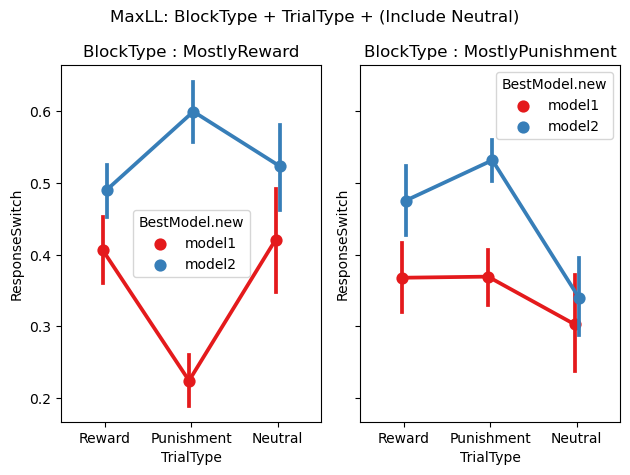

In [12]:
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)
fig.suptitle('MaxLL: BlockType + TrialType + (Include Neutral)')
sns.pointplot(data = df_subject_agg[df_subject_agg['BlockType']=='MostlyReward'], x='TrialType', y='ResponseSwitch', dodge=True, palette='Set1', hue='BestModel.new', ax=axes[0])
sns.pointplot(data = df_subject_agg[df_subject_agg['BlockType']!='MostlyReward'], x='TrialType', y='ResponseSwitch', dodge=True, palette='Set1', hue='BestModel.new', ax=axes[1])
axes[0].set_title('BlockType : MostlyReward')
axes[1].set_title('BlockType : MostlyPunishment')
plt.tight_layout()
plt.show()

## Bad Fit PSwitch

In [13]:
df_good = df_subject_agg[df_subject_agg['BestModel.old']==df_subject_agg['BestModel.new']]
df_bad = df_subject_agg[df_subject_agg['BestModel.old']!=df_subject_agg['BestModel.new']]

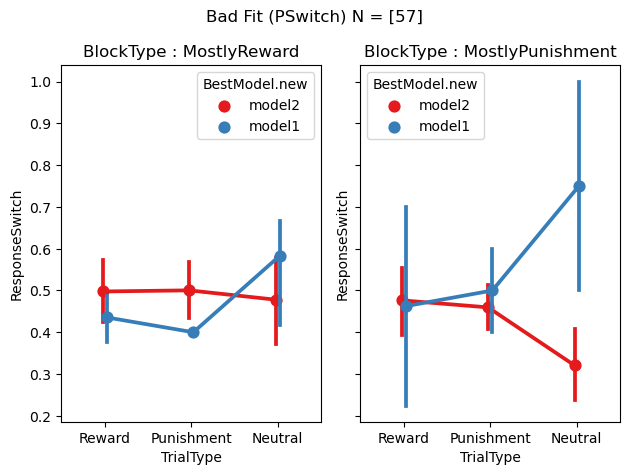

In [14]:
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)
fig.suptitle('Bad Fit (PSwitch) N = [%d]' % (len(df_bad['HCPID'].unique())))
sns.pointplot(data = df_bad[df_bad['BlockType']=='MostlyReward'], x='TrialType', y='ResponseSwitch', dodge=True, palette='Set1', hue='BestModel.new', ax=axes[0])
sns.pointplot(data = df_bad[df_bad['BlockType']!='MostlyReward'], x='TrialType', y='ResponseSwitch', dodge=True, palette='Set1', hue='BestModel.new', ax=axes[1])
axes[0].set_title('BlockType : MostlyReward')
axes[1].set_title('BlockType : MostlyPunishment')
plt.tight_layout()
plt.show()

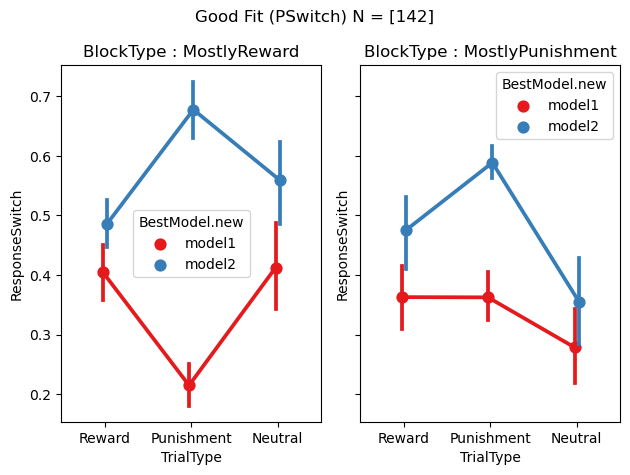

In [15]:
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)
fig.suptitle('Good Fit (PSwitch) N = [%d]' % (len(df_good['HCPID'].unique())))
sns.pointplot(data = df_good[df_good['BlockType']=='MostlyReward'], x='TrialType', y='ResponseSwitch', dodge=True, palette='Set1', hue='BestModel.new', ax=axes[0])
sns.pointplot(data = df_good[df_good['BlockType']!='MostlyReward'], x='TrialType', y='ResponseSwitch', dodge=True, palette='Set1', hue='BestModel.new', ax=axes[1])
axes[0].set_title('BlockType : MostlyReward')
axes[1].set_title('BlockType : MostlyPunishment')
plt.tight_layout()
plt.show()